# Graphing Bloodborne Progress by PSN Trophies
Game progress route: https://bloodborne.wiki.fextralife.com/Game+Progress+Route

In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

### Loading the prepared dataset
Data for this section was sourced on 2020-02-03 from: https://psnprofiles.com/trophies/3431-bloodborne.

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,boss,complete,progress,optional,dlc
0,Cleric Beast,48.8,1,1,0
1,Father Gascoigne,45.6,2,0,0
2,Vicar Amelia,35.8,3,0,0
3,Blood-starved Beast,38.5,4,1,0
4,Witch of Hemwick,34.1,5,1,0


### Cleaning and preparing the dataset
Because the dataset was constructed by myself, I have confidence that there are no unexpected errors however some work is needed to get it in the right shape for analysis.

In [3]:
df.dtypes

boss         object
complete    float64
progress      int64
optional      int64
dlc           int64
dtype: object

In [4]:
# formatting the game progress column for display in plot
df['progress'] = round(df['progress'] / len(df) * 100, 2)

In [5]:
# setting the figure size
plt.rcParams["figure.figsize"] = (26, 22)

# setting font family
plt.rcParams['font.family'] = 'Arial'

# setting plot context
sns.set_context("poster")

### Plotting and Exporting the Figure

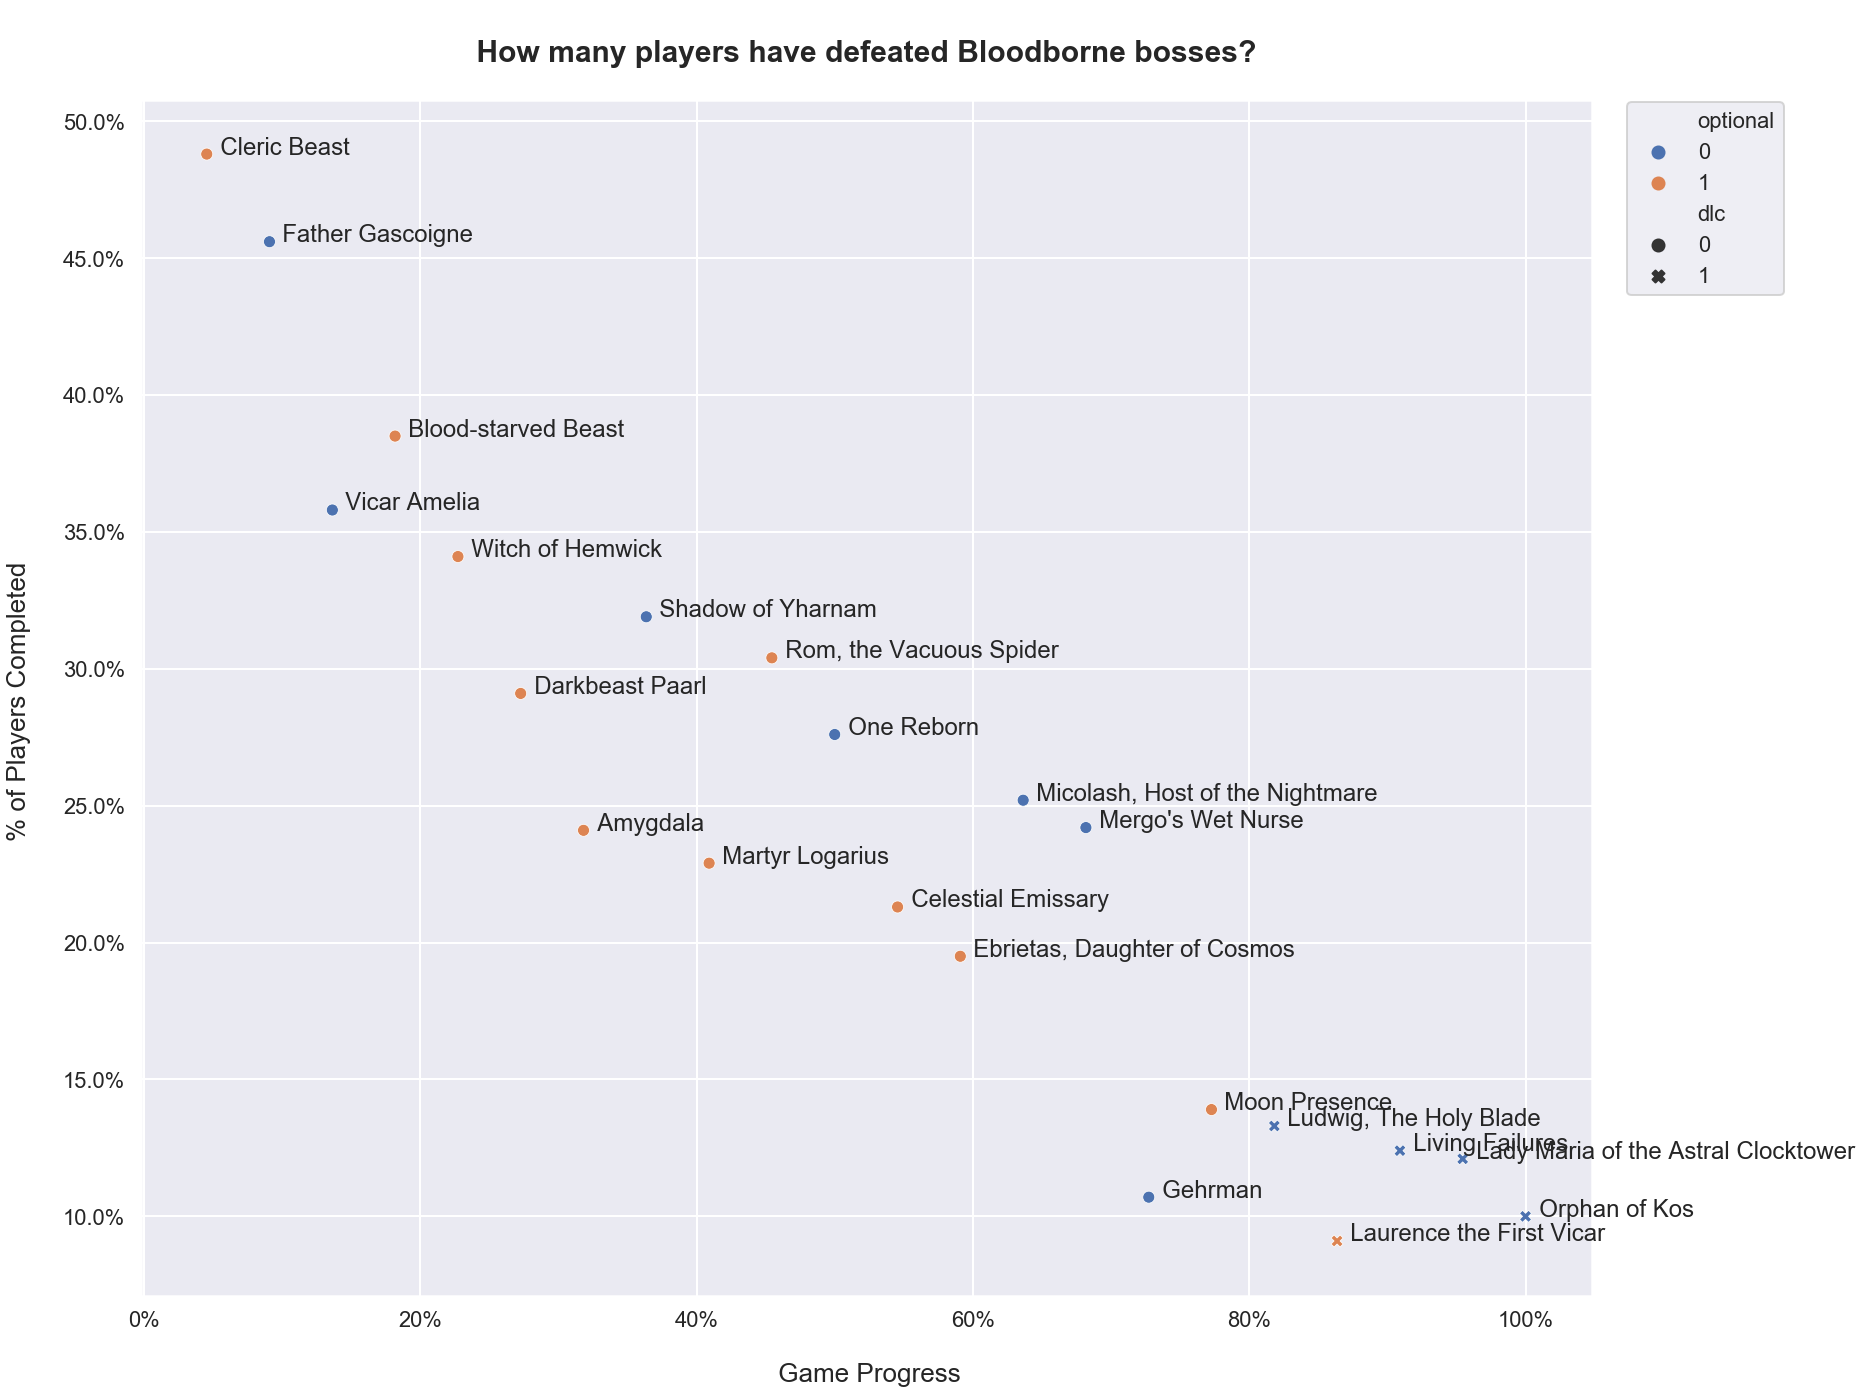

In [23]:
# create the plot object
ax = sns.scatterplot(x = df['progress'], 
                     y = df['complete'],
                     style = df['dlc'],     # conditional formatting 
                     palette = 'deep',
                     hue = df['optional'])  # conditional formatting for if the boss is optional

# adding labels to axis and title
ax.set_title('\n How many players have defeated Bloodborne bosses? \n', fontsize = 30, weight='bold')
ax.set_ylabel("% of Players Completed \n", fontsize = 26)
ax.set_xlabel("\n Game Progress", fontsize = 26)

# formatting the labels to show as %
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

#
ax.legend(loc='upper right', bbox_to_anchor=(1.14, 1.007), ncol=1)

# add in plot annotation for boss names
for i, txt in enumerate(df['boss']):
    ax.annotate(("  " + txt), 
                (df['progress'].iat[i], df['complete'].iat[i]))
    
plt.show()

In [7]:
# output to file
fig = ax.get_figure()
fig.savefig("plot.png")